In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

2023-09-22 17:05:17.734103: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-22 17:05:17.774642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 17:05:18.605135: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df = pd.read_csv('drone_dataset.csv')
df

,lat,lng,altitude,tower_distance,signal_strength
0,23.748907,90.370283,60,1,-52.009880
1,23.748922,90.370279,60,1,-53.046452
2,23.748908,90.370275,60,1,-49.691982
3,23.748905,90.370303,60,1,-49.836586
4,23.748922,90.370284,60,1,-51.437299
...,...,...,...,...,...
29995,23.748332,90.374007,40,100,-100.387946
29996,23.749313,90.374655,40,100,-85.005027
29997,23.749659,90.367576,40,100,-86.968760
29998,23.748054,90.368871,40,100,-92.188638


In [4]:
# separate dataframes by altitude
df60 = df[df['altitude'] == 60]
df50 = df[df['altitude'] == 50]
df40 = df[df['altitude'] == 40]

#

## Visualizing signal strength at different altitudes

Text(0.5, 1.0, 'Signal strength at 40m altitude')

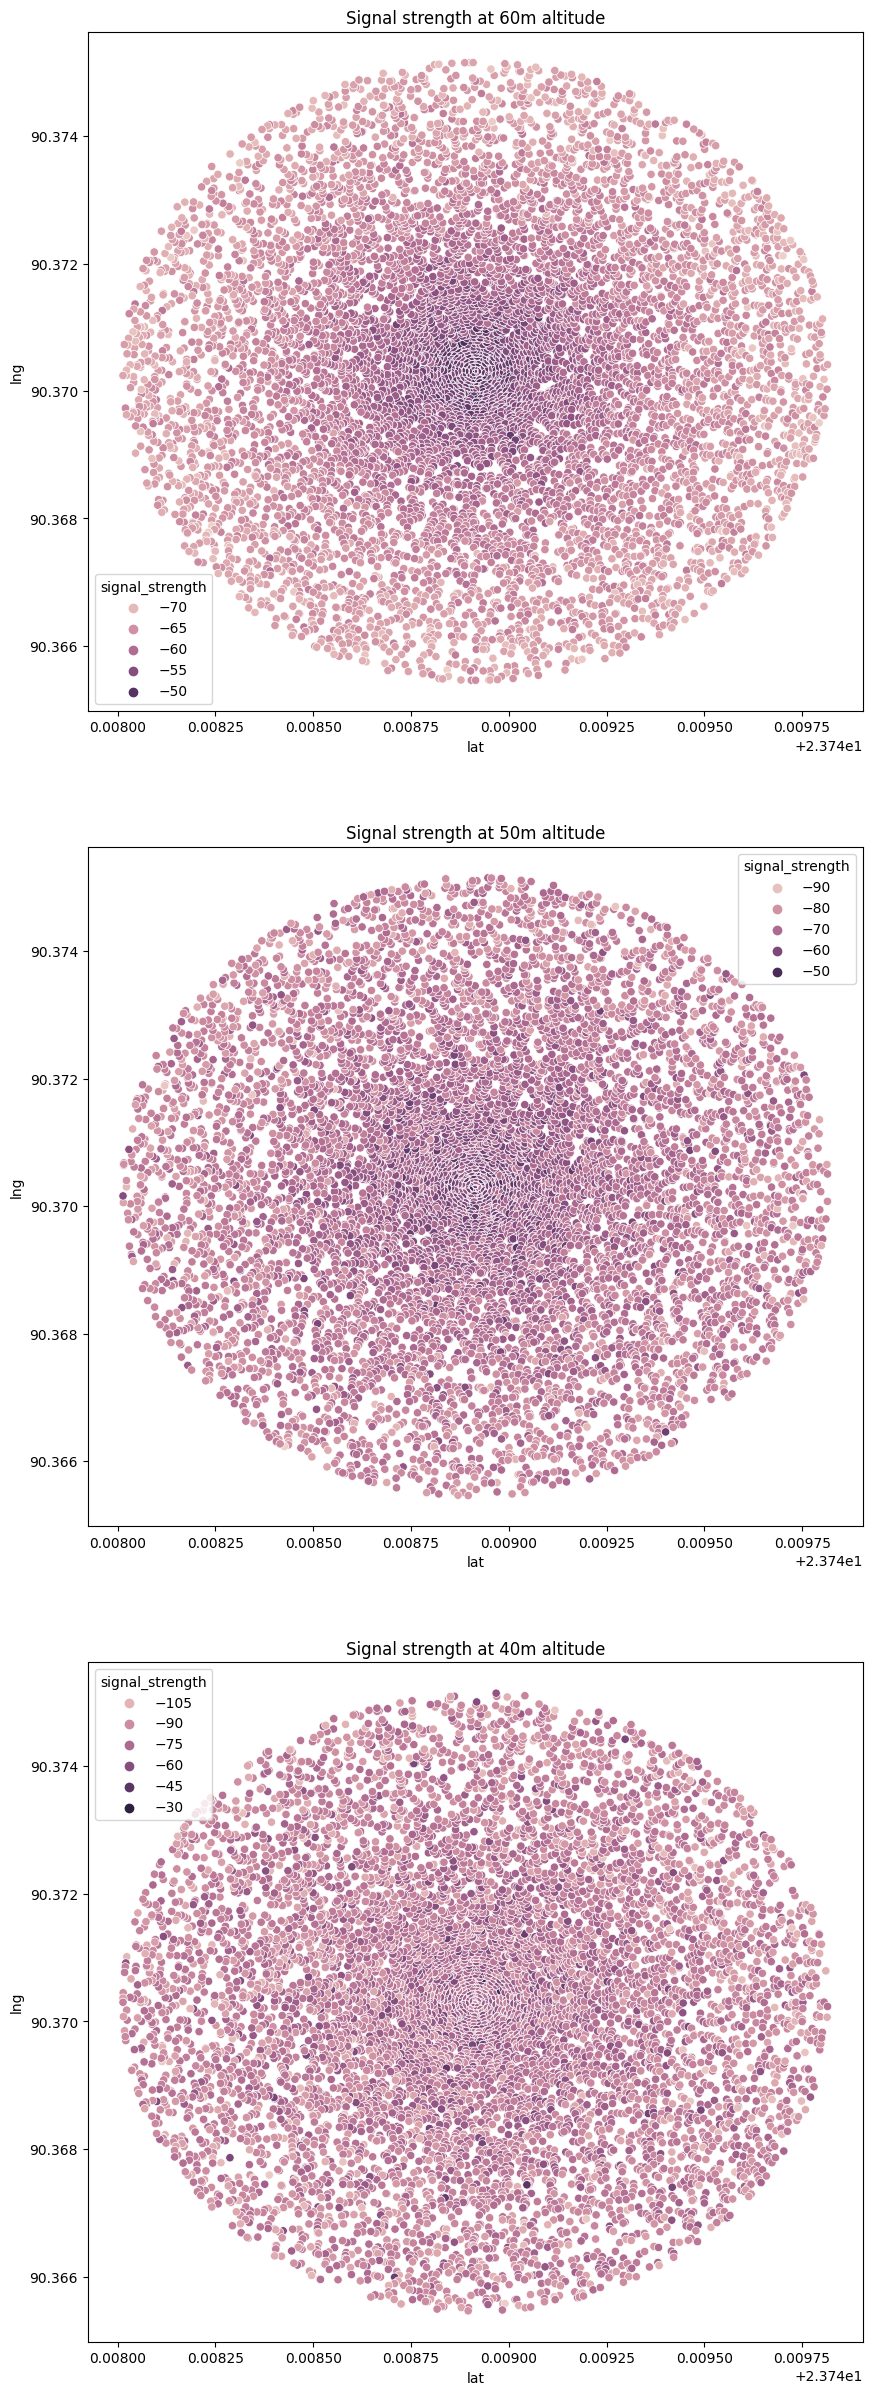

In [5]:
# Scatterplot

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

sns.scatterplot(x=df60['lat'], y=df60['lng'], hue=df60['signal_strength'], ax=ax1)
ax1.set_title('Signal strength at 60m altitude')

sns.scatterplot(x=df50['lat'], y=df50['lng'], hue=df50['signal_strength'], ax=ax2)
ax2.set_title('Signal strength at 50m altitude')

sns.scatterplot(x=df40['lat'], y=df40['lng'], hue=df40['signal_strength'], ax=ax3)
ax3.set_title('Signal strength at 40m altitude')

Text(0.5, 1.0, 'Tower Distance Vs Signal strength at 40m altitude')

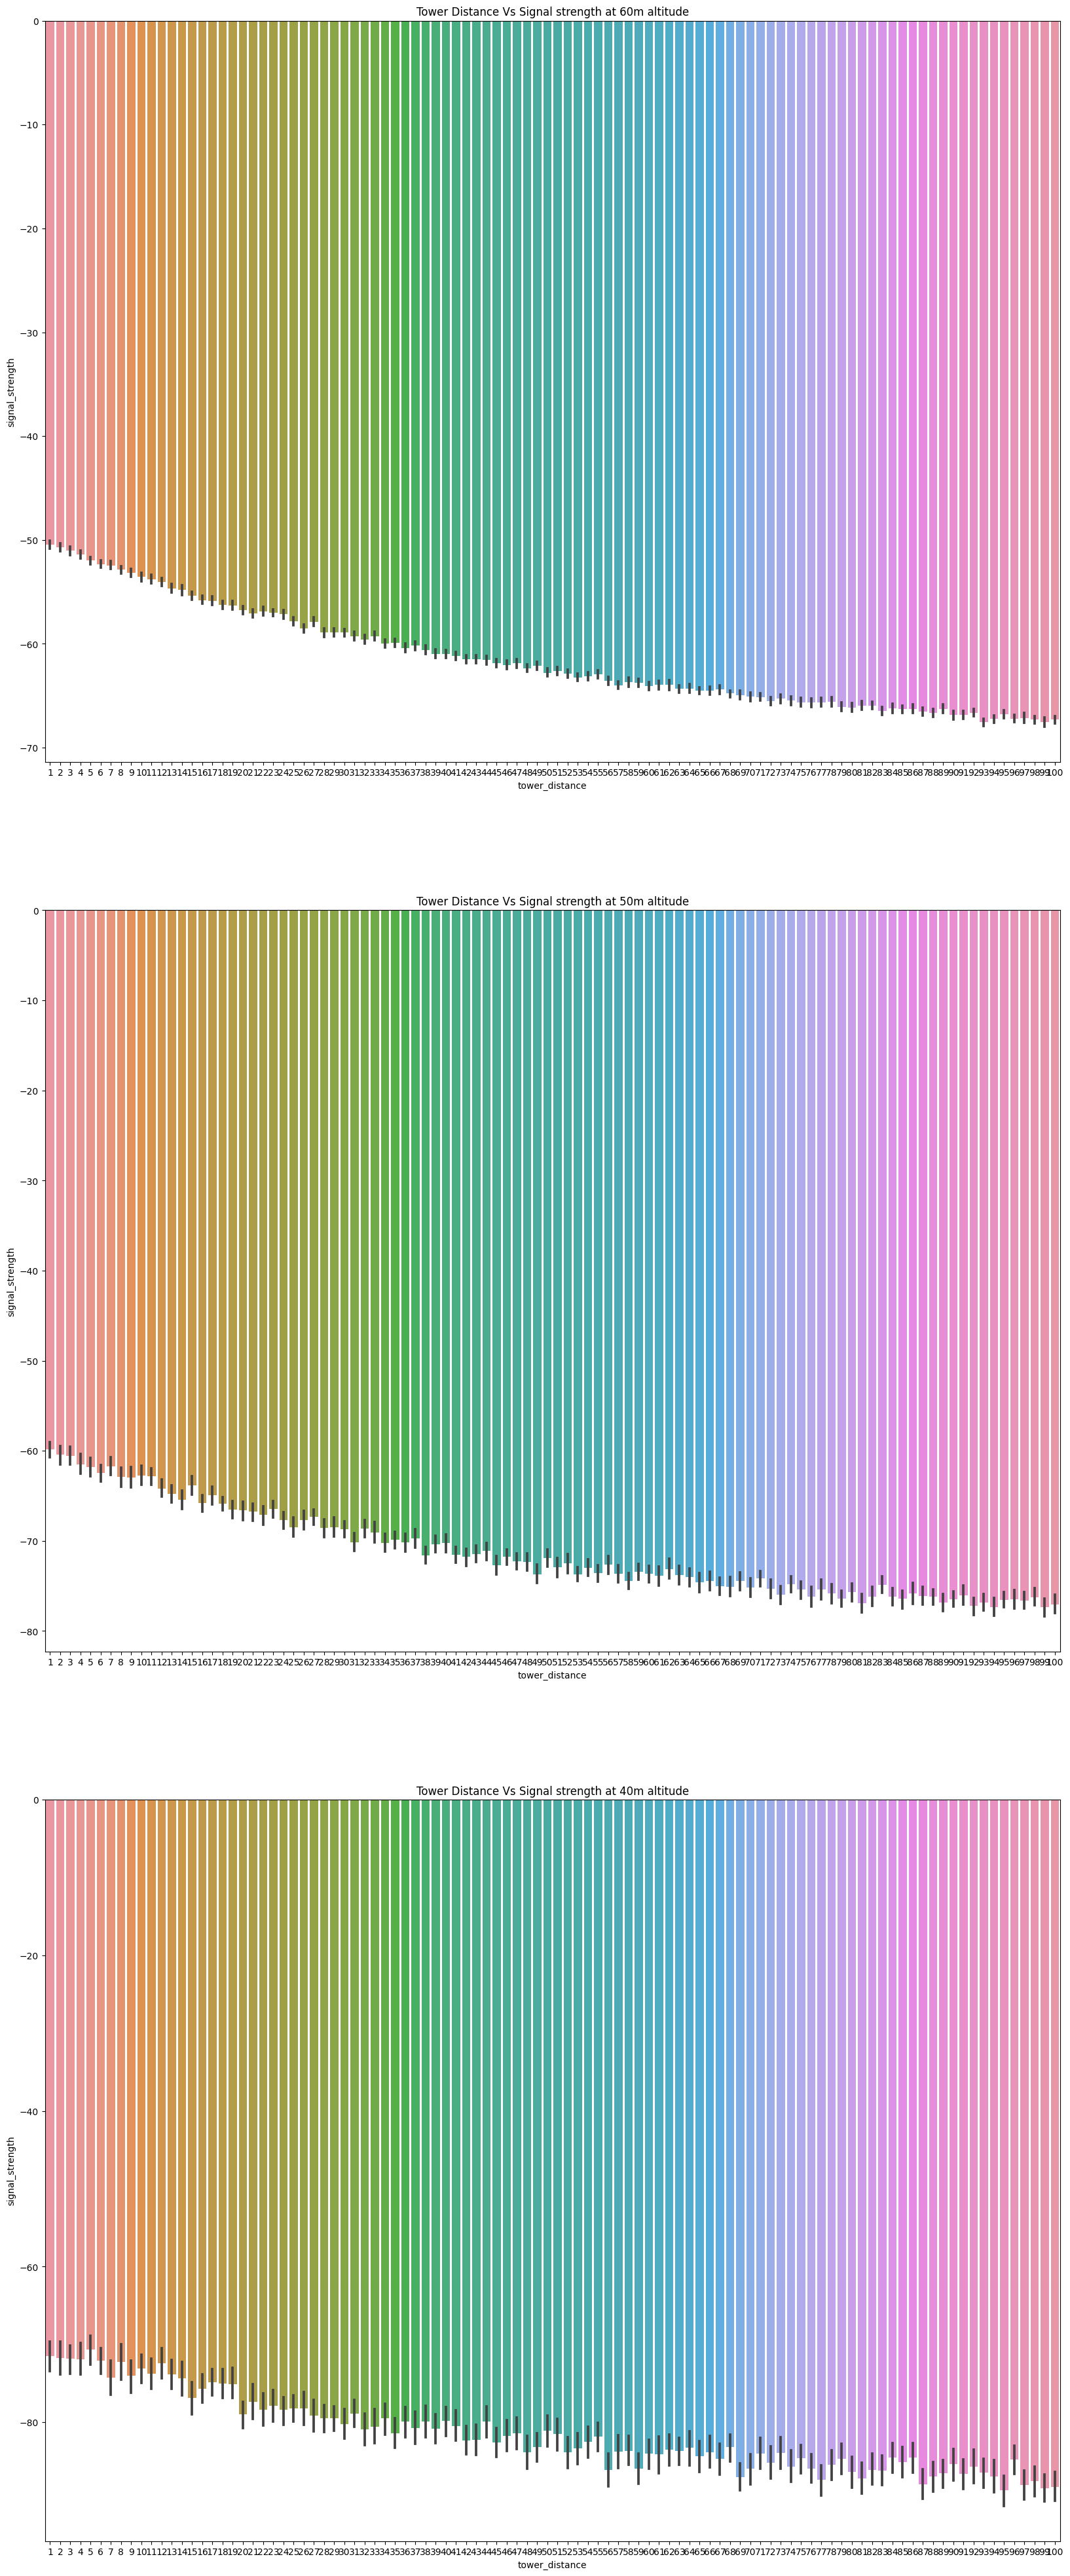

In [6]:
# Barplot

fig2, [axx1, axx2, axx3] = plt.subplots(nrows=3, ncols=1, figsize=(20, 50))

sns.barplot(x=df60['tower_distance'], y=df60['signal_strength'], ax=axx1)
axx1.set_title('Tower Distance Vs Signal strength at 60m altitude')

sns.barplot(x=df50['tower_distance'], y=df50['signal_strength'], ax=axx2)
axx2.set_title('Tower Distance Vs Signal strength at 50m altitude')

sns.barplot(x=df40['tower_distance'], y=df40['signal_strength'], ax=axx3)
axx3.set_title('Tower Distance Vs Signal strength at 40m altitude')

<Axes: xlabel='signal_strength', ylabel='Density'>

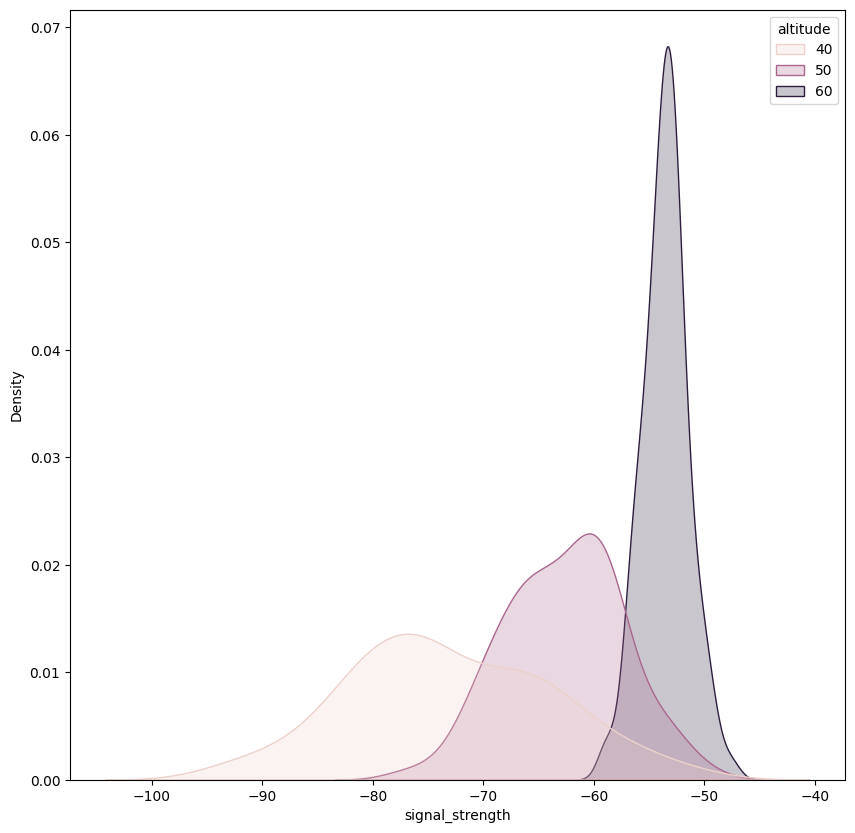

In [7]:
df_10 = df[df['tower_distance'] == 10]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_10, x='signal_strength', hue='altitude', fill=True)

<Axes: xlabel='signal_strength', ylabel='Density'>

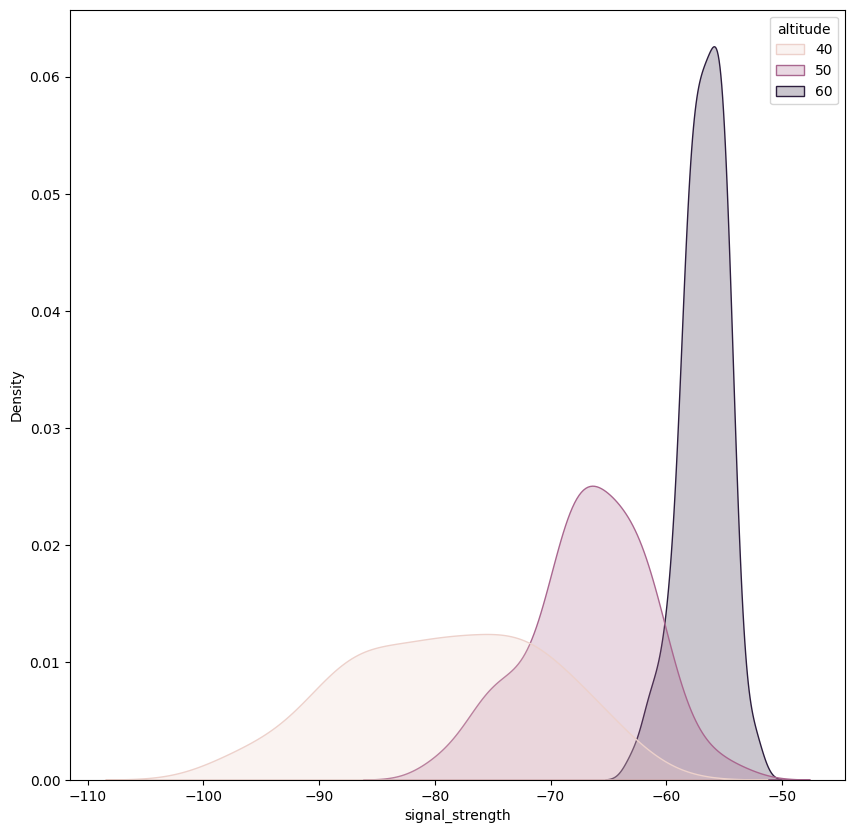

In [8]:
df_20 = df[df['tower_distance'] == 20]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_20, x='signal_strength', hue='altitude', fill=True)

<Axes: xlabel='signal_strength', ylabel='Density'>

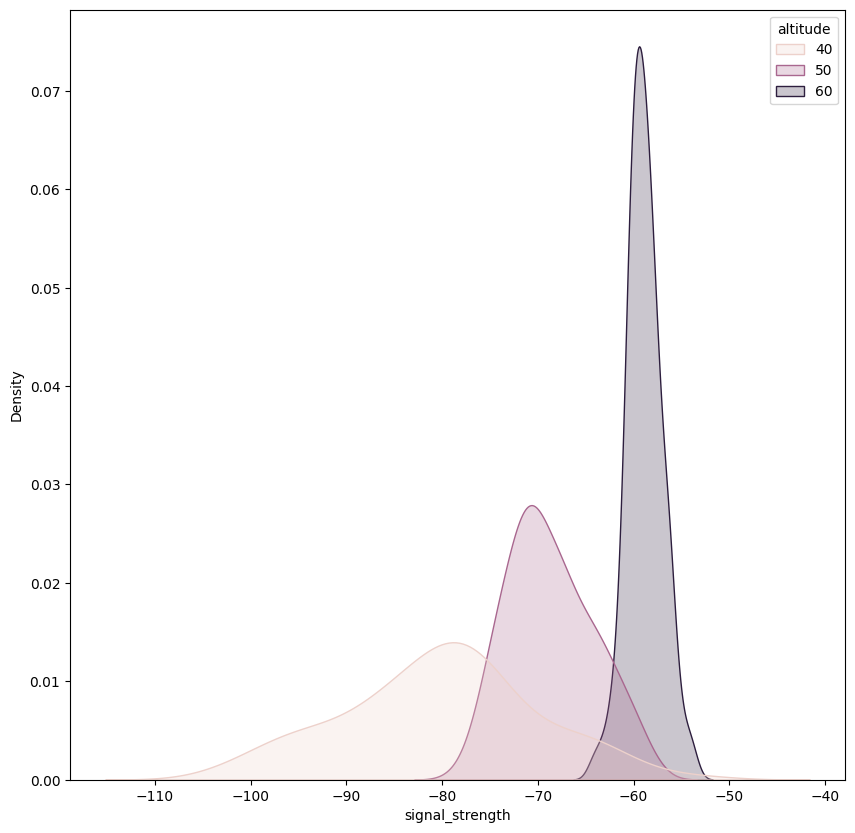

In [9]:
df_30 = df[df['tower_distance'] == 30]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_30, x='signal_strength', hue='altitude', fill=True)

<Axes: xlabel='signal_strength', ylabel='Density'>

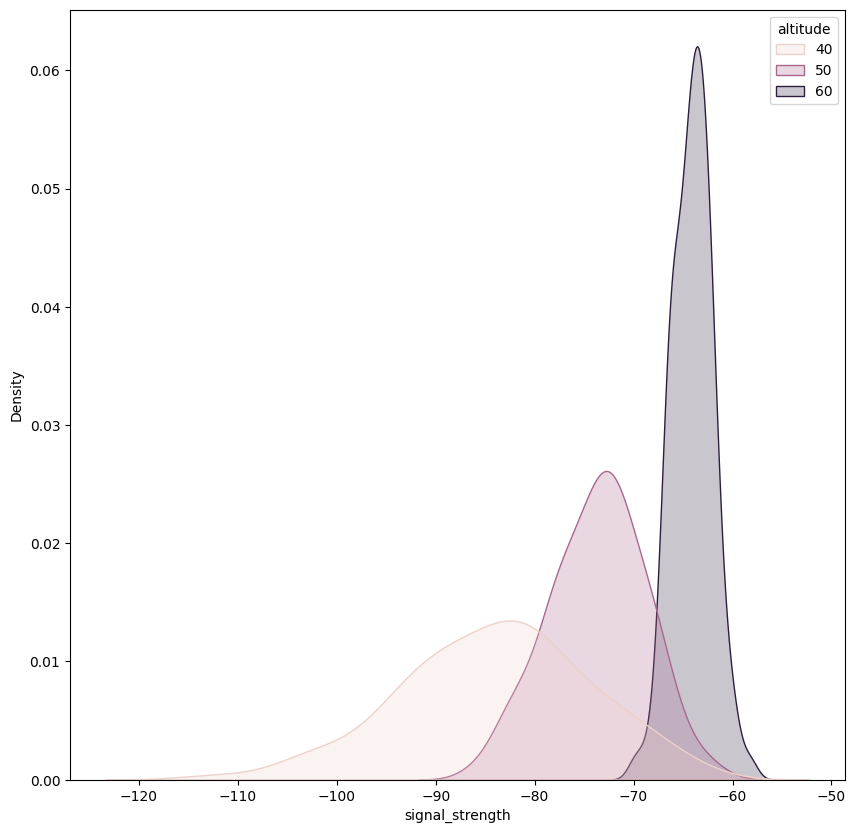

In [10]:
df_60 = df[df['tower_distance'] == 60]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_60, x='signal_strength', hue='altitude', fill=True)


## Train a linear regression model

2023-09-22 17:05:28.640481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-22 17:05:28.671585: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-22 17:05:28.672006: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/50


2023-09-22 17:05:29.666608: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-22 17:05:29.692355: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f3239e7be20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-22 17:05:29.692386: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-09-22 17:05:29.696846: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-22 17:05:29.714040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-09-22 17:05:29.859643: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

300/300 - 2s - loss: 2490.8323 - mean_absolute_error: 42.5062 - val_loss: 158.8966 - val_mean_absolute_error: 10.2234 - 2s/epoch - 8ms/step
Epoch 2/50
300/300 - 1s - loss: 119.1454 - mean_absolute_error: 8.7829 - val_loss: 91.5125 - val_mean_absolute_error: 7.6038 - 637ms/epoch - 2ms/step
Epoch 3/50
300/300 - 1s - loss: 72.2071 - mean_absolute_error: 6.6023 - val_loss: 63.3233 - val_mean_absolute_error: 6.0065 - 596ms/epoch - 2ms/step
Epoch 4/50
300/300 - 1s - loss: 54.1867 - mean_absolute_error: 5.4548 - val_loss: 53.5645 - val_mean_absolute_error: 5.3125 - 586ms/epoch - 2ms/step
Epoch 5/50
300/300 - 1s - loss: 47.8230 - mean_absolute_error: 4.9590 - val_loss: 49.6308 - val_mean_absolute_error: 4.9979 - 567ms/epoch - 2ms/step
Epoch 6/50
300/300 - 1s - loss: 44.5724 - mean_absolute_error: 4.7015 - val_loss: 47.0923 - val_mean_absolute_error: 4.8178 - 570ms/epoch - 2ms/step
Epoch 7/50
300/300 - 1s - loss: 43.3613 - mean_absolute_error: 4.5907 - val_loss: 45.9440 - val_mean_absolute_erro

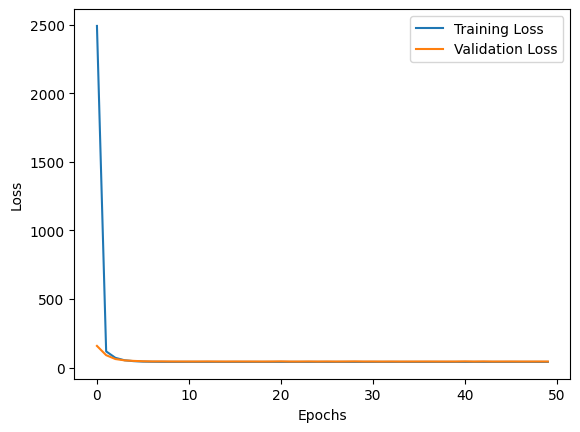

In [11]:
# Split the data into input, output
X = df[['tower_distance', 'altitude']].values
y = df['signal_strength'].values

# Split the data intto training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

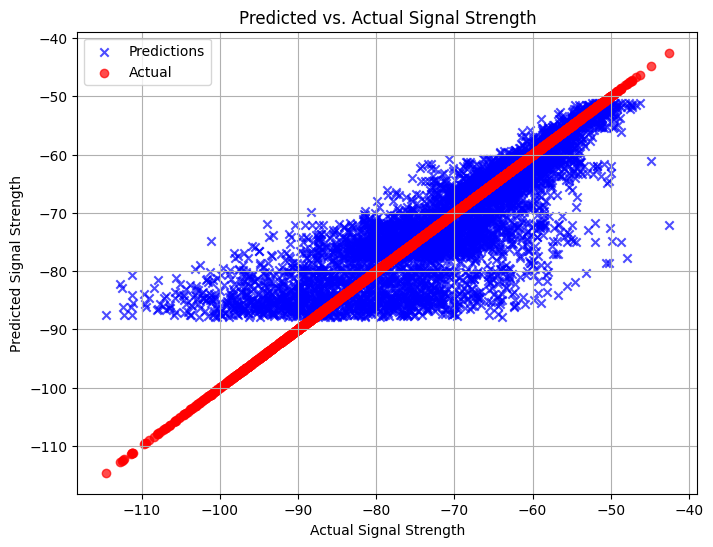

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='x', color='blue', label='Predictions', alpha=0.7)
plt.scatter(y_test, y_test, marker='o', color='red', label='Actual', alpha=0.7)
plt.xlabel('Actual Signal Strength')
plt.ylabel('Predicted Signal Strength')
plt.title('Predicted vs. Actual Signal Strength')
plt.legend()
plt.grid(True)
plt.show()